# Fundamentals of Machine Learning - Exercise 7
Goal of the excercise is to code selected part of the Decision tree algorithm which is focused on the optimum split part using gini index. 

After that the scikit-learn implementation of the Decision tree basic usage will be demonstrated.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_07_meme_02.jpg?raw=true)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load the *Iris* dataset
https://archive.ics.uci.edu/dataset/53/iris
* One of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.
* The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
* One class is linearly separable from the other 2 - the latter are not linearly separable from each other.uted?

|Variable Name | Role | Type | Units |
|:-------|:-------|:-------|:-------|
|sepal length | Feature | Continuous | cm |
|sepal width | Feature | Continuous | cm |
|petal length | Feature | Continuous | cm |
|petal width | Feature | Continuous | cm |
|class | Target | Categorical | Iris Setosa, Iris Versicolour, or Iris Virginica |

In [2]:
df = pd.read_csv(
    'https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/raw/master/datasets/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 💡 Let's take a look at the data first
* 🔎 Do you have an idea how would you divide the data into groupd based on the assigned classed by vertical or horizontal lines?

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

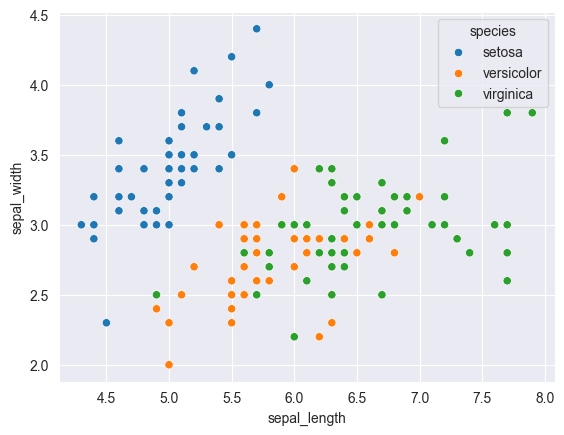

In [3]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

# And now? 😊

<Axes: xlabel='petal_length', ylabel='petal_width'>

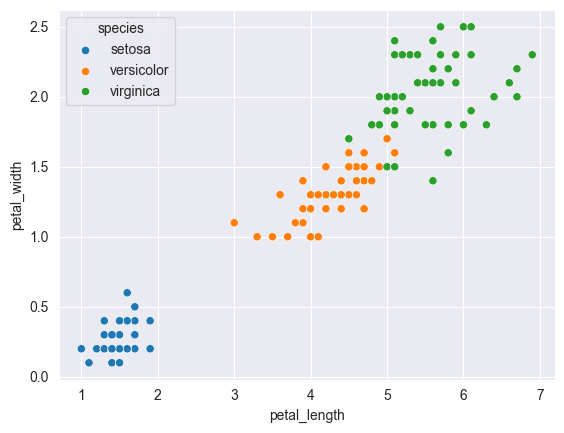

In [4]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

# Also it's always reasonable to take a look at the number of classes in the dataset
* 💡You need to know beforehand about missing values or imbalance of labels

In [5]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# 🔎 What is the purpose of the classification algorithms?
* How the algorithms work in general?
* How does **Decision tree** work in a very simple terms?
    * What is a split?
        * 🔎 Is the data separated only by vertical/horizontal lines or are there any inclined straight lines or curves used?
    * How can we decide on **which feature** and on **which condition** we should split?
    * What is in the leaf of the **Decision tree**?
        * **When** will the decision tree **stop the growth**?

# 📊 Gini Index
* What does it tell us?
    * What is the **minimum** and **maximum** value for 2 classes?
    * And for three?
    * What result should we expect for the whole data set?

## 🚀 Compute the gini index for the whole data set
* 💡 Take a look at [these slides](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/misc/mad3_07.pdf) for the formulas and examples

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_07_meme_03.jpg?raw=true)

### Formulas

* Gini index:
  
$$
G(S) = 1 - \sum_{j=1}^{k} p_{j}^{2}
$$

* where the $p_{j}$  is a fraction of points that belongs to the class j from a set S$

* Gini impurity:
$$
G(S \Rightarrow S_{1},...,S_{r}) = \sum_{i=1}^{r} \frac{S_i}{S} G(S_i)
$$

In [8]:
def gini_index(data: pd.DataFrame):
    probs = 0
    labels = data.species.unique()
    for l in labels:
        p = data.loc[data.species == l].shape[0] / data.shape[0]
        probs += p ** 2
    return 1 - probs

In [9]:
gini_index(df)

0.6666666666666667

## 🚀 Take only the *sepal_width* attribute
* Try to split the by attribute by value *3.35 (<= 3.35)*
* Compute the gini index for the left and the right side of the split
    * Left: 0.629
    * Right: 0.285
* Compute the total gini impurity for this split
    * Total: 0.546

    
**How to solve the example?**
$$
Gini(left) = 1 - \left[ \left(\frac{45}{114}\right)^2 + \left(\frac{49}{114}\right)^2 + \left(\frac{20}{114}\right)^2 \right] = 0.629
$$

$$
Gini(right) = 1 - \left[ \left(\frac{5}{36}\right)^2 + \left(\frac{1}{36}\right)^2 + \left(\frac{30}{36}\right)^2 \right] = 0.285
$$

$$
GiniImpurity = \frac{|df_{left}|}{|df|} * Gini(left) + \frac{|df_{right}|}{|df|} * Gini(right) =  \frac{114}{150} * 0.629 + \frac{36}{150} * 0.285 = 0.546
$$



In [10]:
df_left = df[df.sepal_width <= 3.35]
df_left.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
df_left.shape

(114, 5)

In [13]:
df_left.species.value_counts()

species
versicolor    49
virginica     45
setosa        20
Name: count, dtype: int64

In [14]:
gini_index(df_left)

0.6286549707602339

In [15]:
df_right = df[df.sepal_width > 3.35]
df_right.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [16]:
df_right.shape

(36, 5)

In [17]:
df_right.species.value_counts()

species
setosa        30
virginica      5
versicolor     1
Name: count, dtype: int64

In [18]:
gini_index(df_right)

0.28549382716049376

In [19]:
gini_imp = (df_left.shape[0] / df.shape[0]) * gini_index(df_left) + (df_right.shape[0] / df.shape[0]) * gini_index(
    df_right)
gini_imp

0.5462962962962963

# 🎯 Repeat the process for the all 4 attributes and find the best split
* You will try all the possible boundaries along all the features, i.e. all the axes petal width and sepal width.
    * 💡 How to set the boundary? 
        * Select only the unique values of the chosen attribute (.unique() function)
        * Sort the values (np.sort())
        * Iterate over the array of the values, take every two consecutive numbers and compute their mean
        * The mean is the current split boundary
* For each split the algorithm will compute the **Gini impurity** of the two groups created.
* 💡 Finally you will choose the decision boundary (best split) that gives the lowest Gini impurity for the two groups from all the 4 attbibutes

### Results:
* index = 0, Sepal Length < 5.45, Gini = 0.44
* index = 1, Sepal Width < 3.35, Gini = 0.54
* index = 2, Petal Length < 2.45, Gini = 0.33
* index = 3, Petal Width < 0.80, Gini = 0.33

* **Selected split:**
    * **index = 2, Petal Length < 2.45, Gini = 0.33**
    * ... or index = 3, Petal Width < 0.80, Gini = 0.33

# 🔎 If we have only one split - how will the classification rule-set look like?

In [20]:
def print_splits(df: pd.DataFrame, column: str) -> None:
    vals = np.sort(df[column].unique())
    best = (0, 1)
    for i in range(len(vals) - 1):
        curr, nx = vals[i], vals[i + 1]
        boundary = (curr + nx) / 2.0
        df_left, df_right = df[df[column] <= boundary], df[df[column] > boundary]
        gini_imp = (df_left.shape[0] / df.shape[0]) * gini_index(df_left) + (
                    df_right.shape[0] / df.shape[0]) * gini_index(df_right)
        if gini_imp < best[1]:
            best = (boundary, gini_imp)
        print(f'Gini: {gini_imp:.3f}, Boundary: {boundary:.2f}')
    print(f'Best -> Gini: {best[1]:.3f}, Boundary: {best[0]:.2f}')

## sepal_length

* Gini: 0.662, Boundary: 4.35
* Gini: 0.648, Boundary: 4.45
* Gini: 0.644, Boundary: 4.55
* Gini: 0.624, Boundary: 4.65
* Gini: 0.614, Boundary: 4.75
* Gini: 0.587, Boundary: 4.85
* Gini: 0.581, Boundary: 4.95
* Gini: 0.547, Boundary: 5.05
* Gini: 0.498, Boundary: 5.15
* Gini: 0.482, Boundary: 5.25
* Gini: 0.474, Boundary: 5.35
* Gini: 0.439, Boundary: 5.45
* Gini: 0.449, Boundary: 5.55
* Gini: 0.475, Boundary: 5.65
* Gini: 0.475, Boundary: 5.75
* Gini: 0.492, Boundary: 5.85
* Gini: 0.500, Boundary: 5.95
* Gini: 0.512, Boundary: 6.05
* Gini: 0.520, Boundary: 6.15
* Gini: 0.528, Boundary: 6.25
* Gini: 0.558, Boundary: 6.35
* Gini: 0.580, Boundary: 6.45
* Gini: 0.598, Boundary: 6.55
* Gini: 0.591, Boundary: 6.65
* Gini: 0.603, Boundary: 6.75
* Gini: 0.608, Boundary: 6.85
* Gini: 0.617, Boundary: 6.95
* Gini: 0.609, Boundary: 7.05
* Gini: 0.614, Boundary: 7.15
* Gini: 0.629, Boundary: 7.25
* Gini: 0.634, Boundary: 7.35
* Gini: 0.639, Boundary: 7.50
* Gini: 0.644, Boundary: 7.65
* Gini: 0.662, Boundary: 7.80
* Best -> Gini: 0.439, Boundary: 5.45

In [21]:
print_splits(df, 'sepal_length')

Gini: 0.662, Boundary: 4.35
Gini: 0.648, Boundary: 4.45
Gini: 0.644, Boundary: 4.55
Gini: 0.624, Boundary: 4.65
Gini: 0.614, Boundary: 4.75
Gini: 0.587, Boundary: 4.85
Gini: 0.581, Boundary: 4.95
Gini: 0.547, Boundary: 5.05
Gini: 0.498, Boundary: 5.15
Gini: 0.482, Boundary: 5.25
Gini: 0.474, Boundary: 5.35
Gini: 0.439, Boundary: 5.45
Gini: 0.449, Boundary: 5.55
Gini: 0.475, Boundary: 5.65
Gini: 0.475, Boundary: 5.75
Gini: 0.492, Boundary: 5.85
Gini: 0.500, Boundary: 5.95
Gini: 0.512, Boundary: 6.05
Gini: 0.520, Boundary: 6.15
Gini: 0.528, Boundary: 6.25
Gini: 0.558, Boundary: 6.35
Gini: 0.580, Boundary: 6.45
Gini: 0.598, Boundary: 6.55
Gini: 0.591, Boundary: 6.65
Gini: 0.603, Boundary: 6.75
Gini: 0.608, Boundary: 6.85
Gini: 0.617, Boundary: 6.95
Gini: 0.609, Boundary: 7.05
Gini: 0.614, Boundary: 7.15
Gini: 0.629, Boundary: 7.25
Gini: 0.634, Boundary: 7.35
Gini: 0.639, Boundary: 7.50
Gini: 0.644, Boundary: 7.65
Gini: 0.662, Boundary: 7.80
Best -> Gini: 0.439, Boundary: 5.45


## sepal_width

In [22]:
print_splits(df, 'sepal_width')

Gini: 0.662, Boundary: 2.10
Gini: 0.659, Boundary: 2.25
Gini: 0.652, Boundary: 2.35
Gini: 0.639, Boundary: 2.45
Gini: 0.637, Boundary: 2.55
Gini: 0.629, Boundary: 2.65
Gini: 0.615, Boundary: 2.75
Gini: 0.593, Boundary: 2.85
Gini: 0.569, Boundary: 2.95
Gini: 0.555, Boundary: 3.05
Gini: 0.561, Boundary: 3.15
Gini: 0.556, Boundary: 3.25
Gini: 0.546, Boundary: 3.35
Gini: 0.581, Boundary: 3.45
Gini: 0.614, Boundary: 3.55
Gini: 0.618, Boundary: 3.65
Gini: 0.633, Boundary: 3.75
Gini: 0.639, Boundary: 3.85
Gini: 0.648, Boundary: 3.95
Gini: 0.653, Boundary: 4.05
Gini: 0.658, Boundary: 4.15
Gini: 0.662, Boundary: 4.30
Best -> Gini: 0.546, Boundary: 3.35


## petal_length

In [23]:
print_splits(df, 'petal_length')

Gini: 0.662, Boundary: 1.05
Gini: 0.658, Boundary: 1.15
Gini: 0.648, Boundary: 1.25
Gini: 0.614, Boundary: 1.35
Gini: 0.546, Boundary: 1.45
Gini: 0.448, Boundary: 1.55
Gini: 0.390, Boundary: 1.65
Gini: 0.353, Boundary: 1.80
Gini: 0.333, Boundary: 2.45
Gini: 0.343, Boundary: 3.15
Gini: 0.361, Boundary: 3.40
Gini: 0.376, Boundary: 3.55
Gini: 0.383, Boundary: 3.65
Gini: 0.390, Boundary: 3.75
Gini: 0.396, Boundary: 3.85
Gini: 0.412, Boundary: 3.95
Gini: 0.431, Boundary: 4.05
Gini: 0.439, Boundary: 4.15
Gini: 0.444, Boundary: 4.25
Gini: 0.444, Boundary: 4.35
Gini: 0.442, Boundary: 4.45
Gini: 0.434, Boundary: 4.55
Gini: 0.422, Boundary: 4.65
Gini: 0.393, Boundary: 4.75
Gini: 0.398, Boundary: 4.85
Gini: 0.409, Boundary: 4.95
Gini: 0.425, Boundary: 5.05
Gini: 0.471, Boundary: 5.15
Gini: 0.486, Boundary: 5.25
Gini: 0.500, Boundary: 5.35
Gini: 0.514, Boundary: 5.45
Gini: 0.533, Boundary: 5.55
Gini: 0.570, Boundary: 5.65
Gini: 0.587, Boundary: 5.75
Gini: 0.603, Boundary: 5.85
Gini: 0.614, Boundar

## petal_width

In [24]:
print_splits(df, 'petal_width')

Gini: 0.639, Boundary: 0.15
Gini: 0.471, Boundary: 0.25
Gini: 0.416, Boundary: 0.35
Gini: 0.353, Boundary: 0.45
Gini: 0.343, Boundary: 0.55
Gini: 0.333, Boundary: 0.80
Gini: 0.390, Boundary: 1.05
Gini: 0.407, Boundary: 1.15
Gini: 0.428, Boundary: 1.25
Gini: 0.443, Boundary: 1.35
Gini: 0.438, Boundary: 1.45
Gini: 0.405, Boundary: 1.55
Gini: 0.391, Boundary: 1.65
Gini: 0.391, Boundary: 1.75
Gini: 0.471, Boundary: 1.85
Gini: 0.507, Boundary: 1.95
Gini: 0.546, Boundary: 2.05
Gini: 0.581, Boundary: 2.15
Gini: 0.598, Boundary: 2.25
Gini: 0.639, Boundary: 2.35
Gini: 0.653, Boundary: 2.45
Best -> Gini: 0.333, Boundary: 0.80


# 🎯 Split the data using the selected split criterion 
* 💡 **Use the one using petal_length 😊**

1) Repeat the whole process one more time for the part of the data with more than 1 class
   
2) Find the best split again

3) Draw the decision tree with the two defined levels you have created this way
    * You can use any graphic editor you like, even the MS Paint 😃

In [25]:
df_petal_left = df[df.petal_length <= 2.45]
df_petal_right = df[df.petal_length > 2.45]

In [26]:
df_petal_left.species.value_counts()

species
setosa    50
Name: count, dtype: int64

In [27]:
df_petal_right.species.value_counts()

species
versicolor    50
virginica     50
Name: count, dtype: int64

In [28]:
for c in df_petal_right.columns[:-1]:
    print(f'{c}')
    print_splits(df_petal_right, c)
    print(''.join(['-' for _ in range(50)]))

sepal_length
Gini: 0.500, Boundary: 4.95
Gini: 0.495, Boundary: 5.05
Gini: 0.491, Boundary: 5.15
Gini: 0.486, Boundary: 5.30
Gini: 0.481, Boundary: 5.45
Gini: 0.453, Boundary: 5.55
Gini: 0.434, Boundary: 5.65
Gini: 0.411, Boundary: 5.75
Gini: 0.423, Boundary: 5.85
Gini: 0.418, Boundary: 5.95
Gini: 0.407, Boundary: 6.05
Gini: 0.393, Boundary: 6.15
Gini: 0.394, Boundary: 6.25
Gini: 0.418, Boundary: 6.35
Gini: 0.436, Boundary: 6.45
Gini: 0.453, Boundary: 6.55
Gini: 0.437, Boundary: 6.65
Gini: 0.439, Boundary: 6.75
Gini: 0.440, Boundary: 6.85
Gini: 0.447, Boundary: 6.95
Gini: 0.432, Boundary: 7.05
Gini: 0.438, Boundary: 7.15
Gini: 0.457, Boundary: 7.25
Gini: 0.462, Boundary: 7.35
Gini: 0.468, Boundary: 7.50
Gini: 0.474, Boundary: 7.65
Gini: 0.495, Boundary: 7.80
Best -> Gini: 0.393, Boundary: 6.15
--------------------------------------------------
sepal_width
Gini: 0.495, Boundary: 2.10
Gini: 0.495, Boundary: 2.25
Gini: 0.481, Boundary: 2.35
Gini: 0.464, Boundary: 2.45
Gini: 0.478, Boundar

# 📊 Introduction to the scikit-learn (Sklearn) library
* Open source library for predictive data analysis. Contains algorithms for classification, clustering and others.

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_07_meme_01.jpg?raw=true)

- Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Let's start with splitting the data into the input and output part
* 💡 Usually named as a *X* and *y* variables

In [30]:
X, y = df.loc[:, df.columns != 'species'], df.loc[:, 'species']

In [31]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# What is the size of our data?

In [33]:
X.shape, y.shape

((150, 4), (150,))

## 🔎 Doing evaluation process for every classification or regressions task is mandatory
* Do you know how to evaluate models?
* Do you know **train test split** method for evaluation?
* Do you know any **different** evaluation process?

## Lets continue with train test split process. Split dataset to train:test ratio 60:40. Check how many records/rows do you have in splitted variables.
* 💡 Number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 4), (60, 4), (90,), (60,))

## Take a look on data in variable y_test 
- Can you detect how many elements of each class is represented in test split?

In [35]:
pd.Series(y_test).value_counts()

species
setosa        23
versicolor    19
virginica     18
Name: count, dtype: int64

# 🚀 Create the Decision tree classifier instance

In [36]:
clf = DecisionTreeClassifier()

## 💡 Use *fit()* method for training of classifier

In [37]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Lets use trained model for the prediction part
* 💡 Get predictions via the method *predict()*

In [38]:
y_pred = clf.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor'], dtype=object)

# 🔎 Can we evaluate our model? 
* How good is it?
* What does accuracy mean?

In [39]:
accuracy_score(y_test, y_pred)

0.9833333333333333

## How does the trained Decision tree look like?

### We can use either text representation as follows...

In [40]:
print(export_text(clf, show_weights=True, feature_names=list(X.columns.values)))

|--- petal_length <= 2.45
|   |--- weights: [27.00, 0.00, 0.00] class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 5.35
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- petal_length <= 4.95
|   |   |   |   |   |--- weights: [0.00, 28.00, 0.00] class: versicolor
|   |   |   |   |--- petal_length >  4.95
|   |   |   |   |   |--- sepal_width <= 2.45
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: virginica
|   |   |   |   |   |--- sepal_width >  2.45
|   |   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: versicolor
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- sepal_length <= 5.80
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: virginica
|   |   |   |   |--- sepal_length >  5.80
|   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: versicolor
|   |   |--- petal_length >  5.35
|   |   |   |--- weights: [0.00, 0.00, 2.00] class: virginica
|   |--- petal_width >  1.75
|   |   |--- p

### ...or more convinient graphical diagram 😊

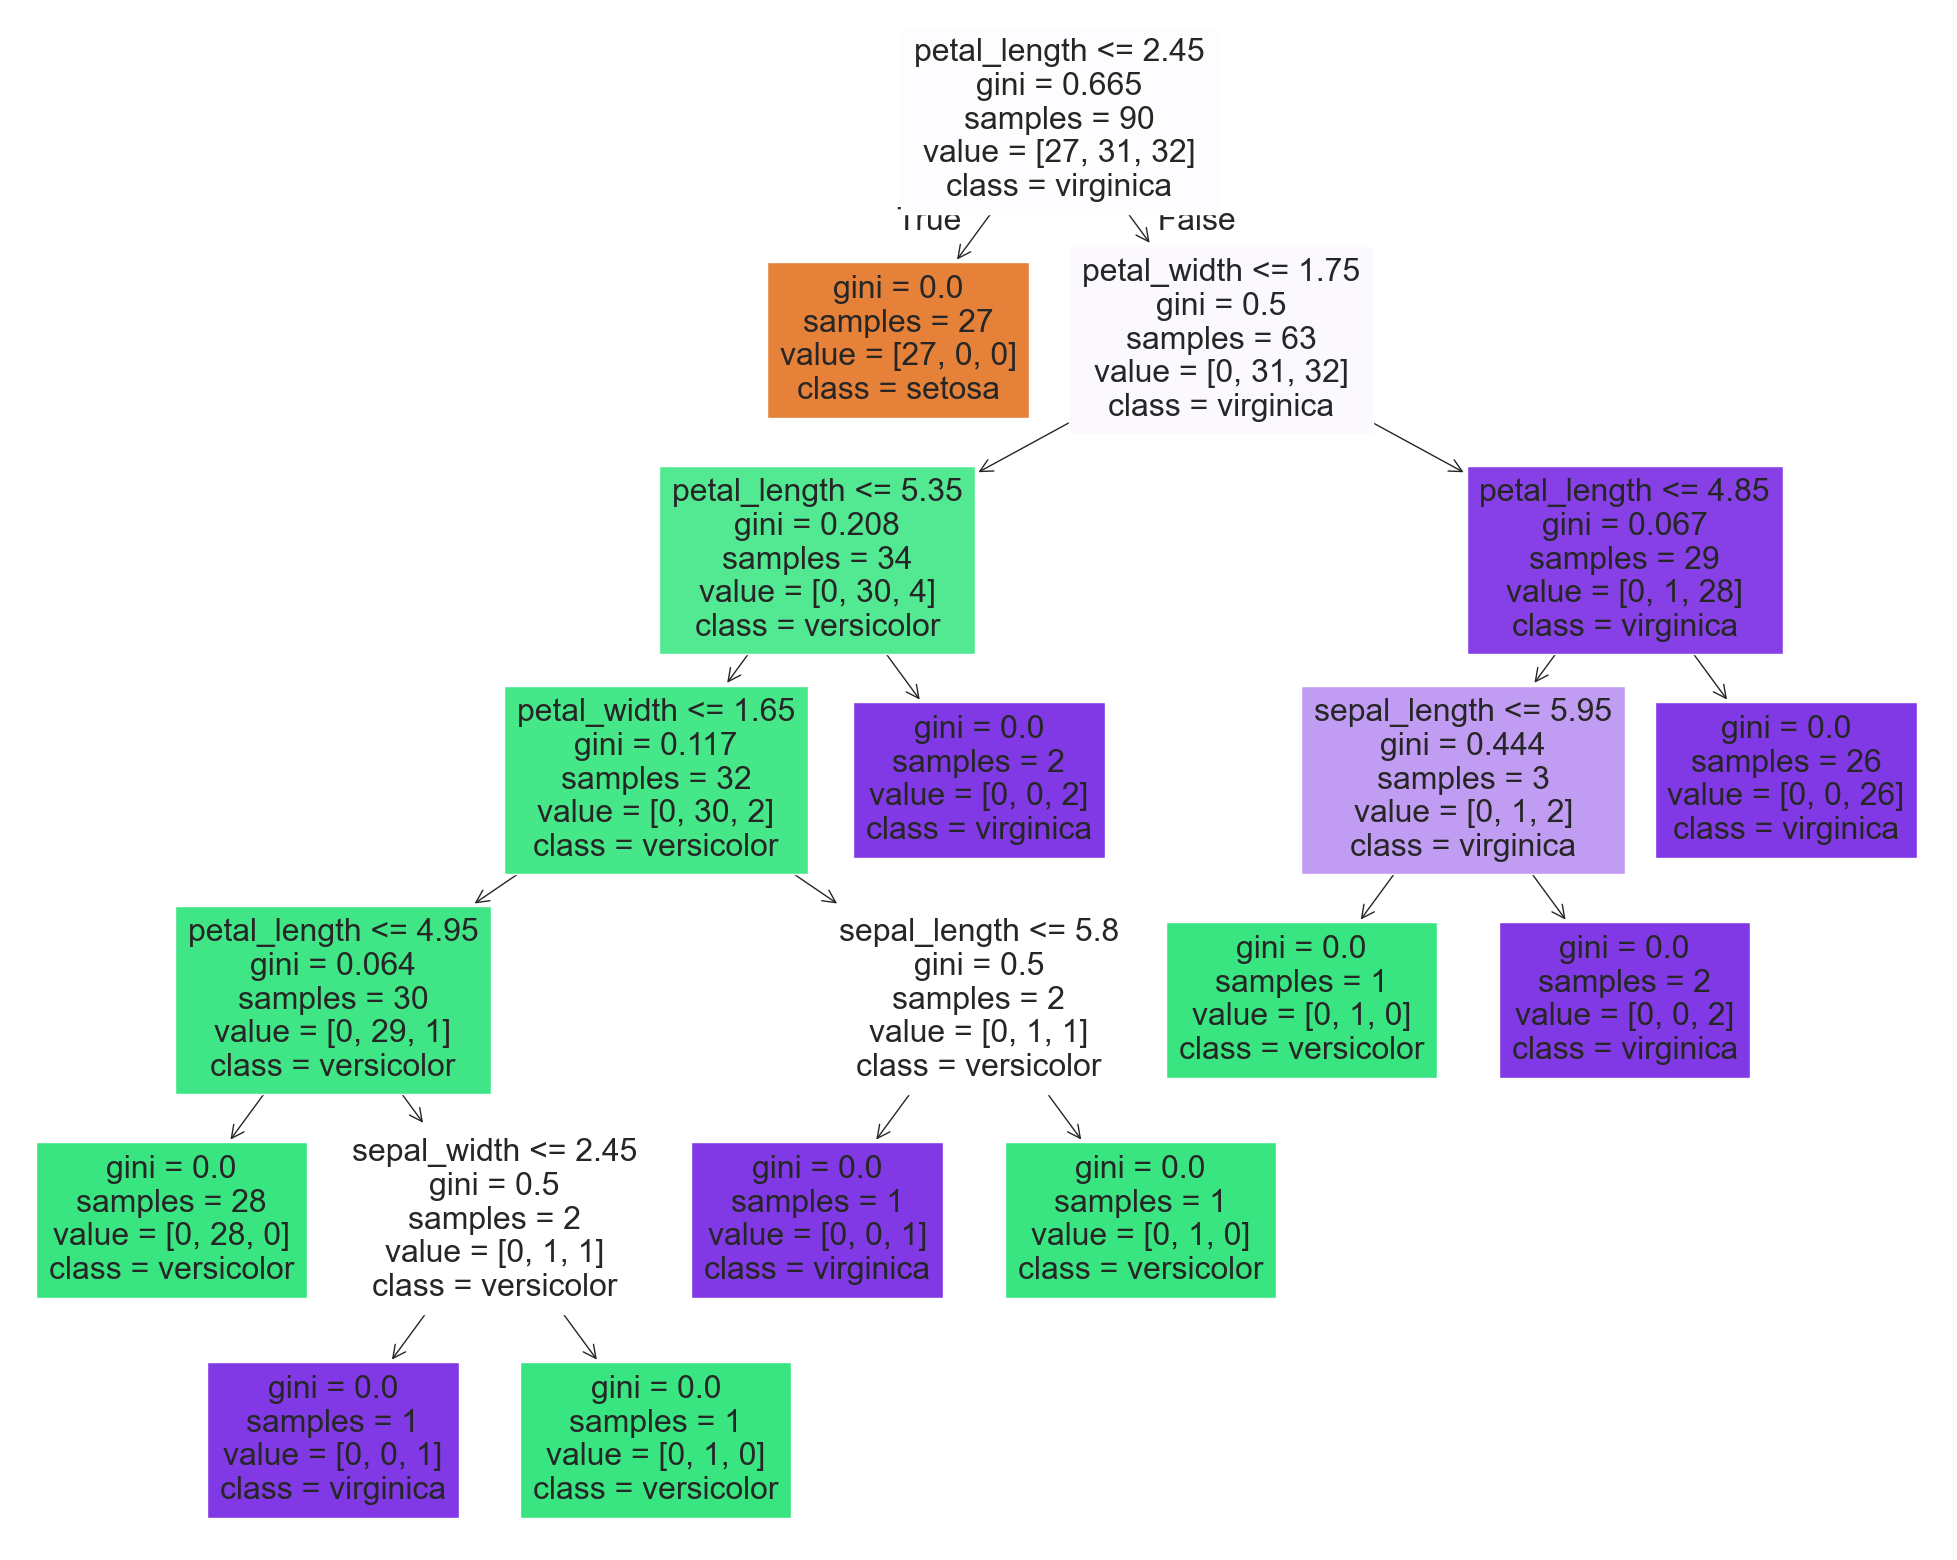

In [41]:
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(clf, feature_names=list(X.columns.values), filled=True, class_names=clf.classes_)

# ✅ Task (2p)
* Finish the implementation task from the exercise